This is a dataset containing over 21613 houses and their characteristics, the goal is to find the best model to predict a house’s price: # 


1. Explore this dataset using what you have learned in data preprocessing and data visualization 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
df=pd.read_csv('kc_house_data.csv')


In [3]:
## print the top records 
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [7]:
df.shape

(21613, 21)

Drop features that are not required to build our model


Missing Values

In [8]:
df.keys()

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [9]:
df.view

0        0
1        0
2        0
3        0
4        0
        ..
21608    0
21609    0
21610    0
21611    0
21612    0
Name: view, Length: 21613, dtype: int64

In [10]:
  df.isnull()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
21609,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
21610,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
21611,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [11]:
 df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

# 2. Write a paragraph selecting the most important features (feature selection). 

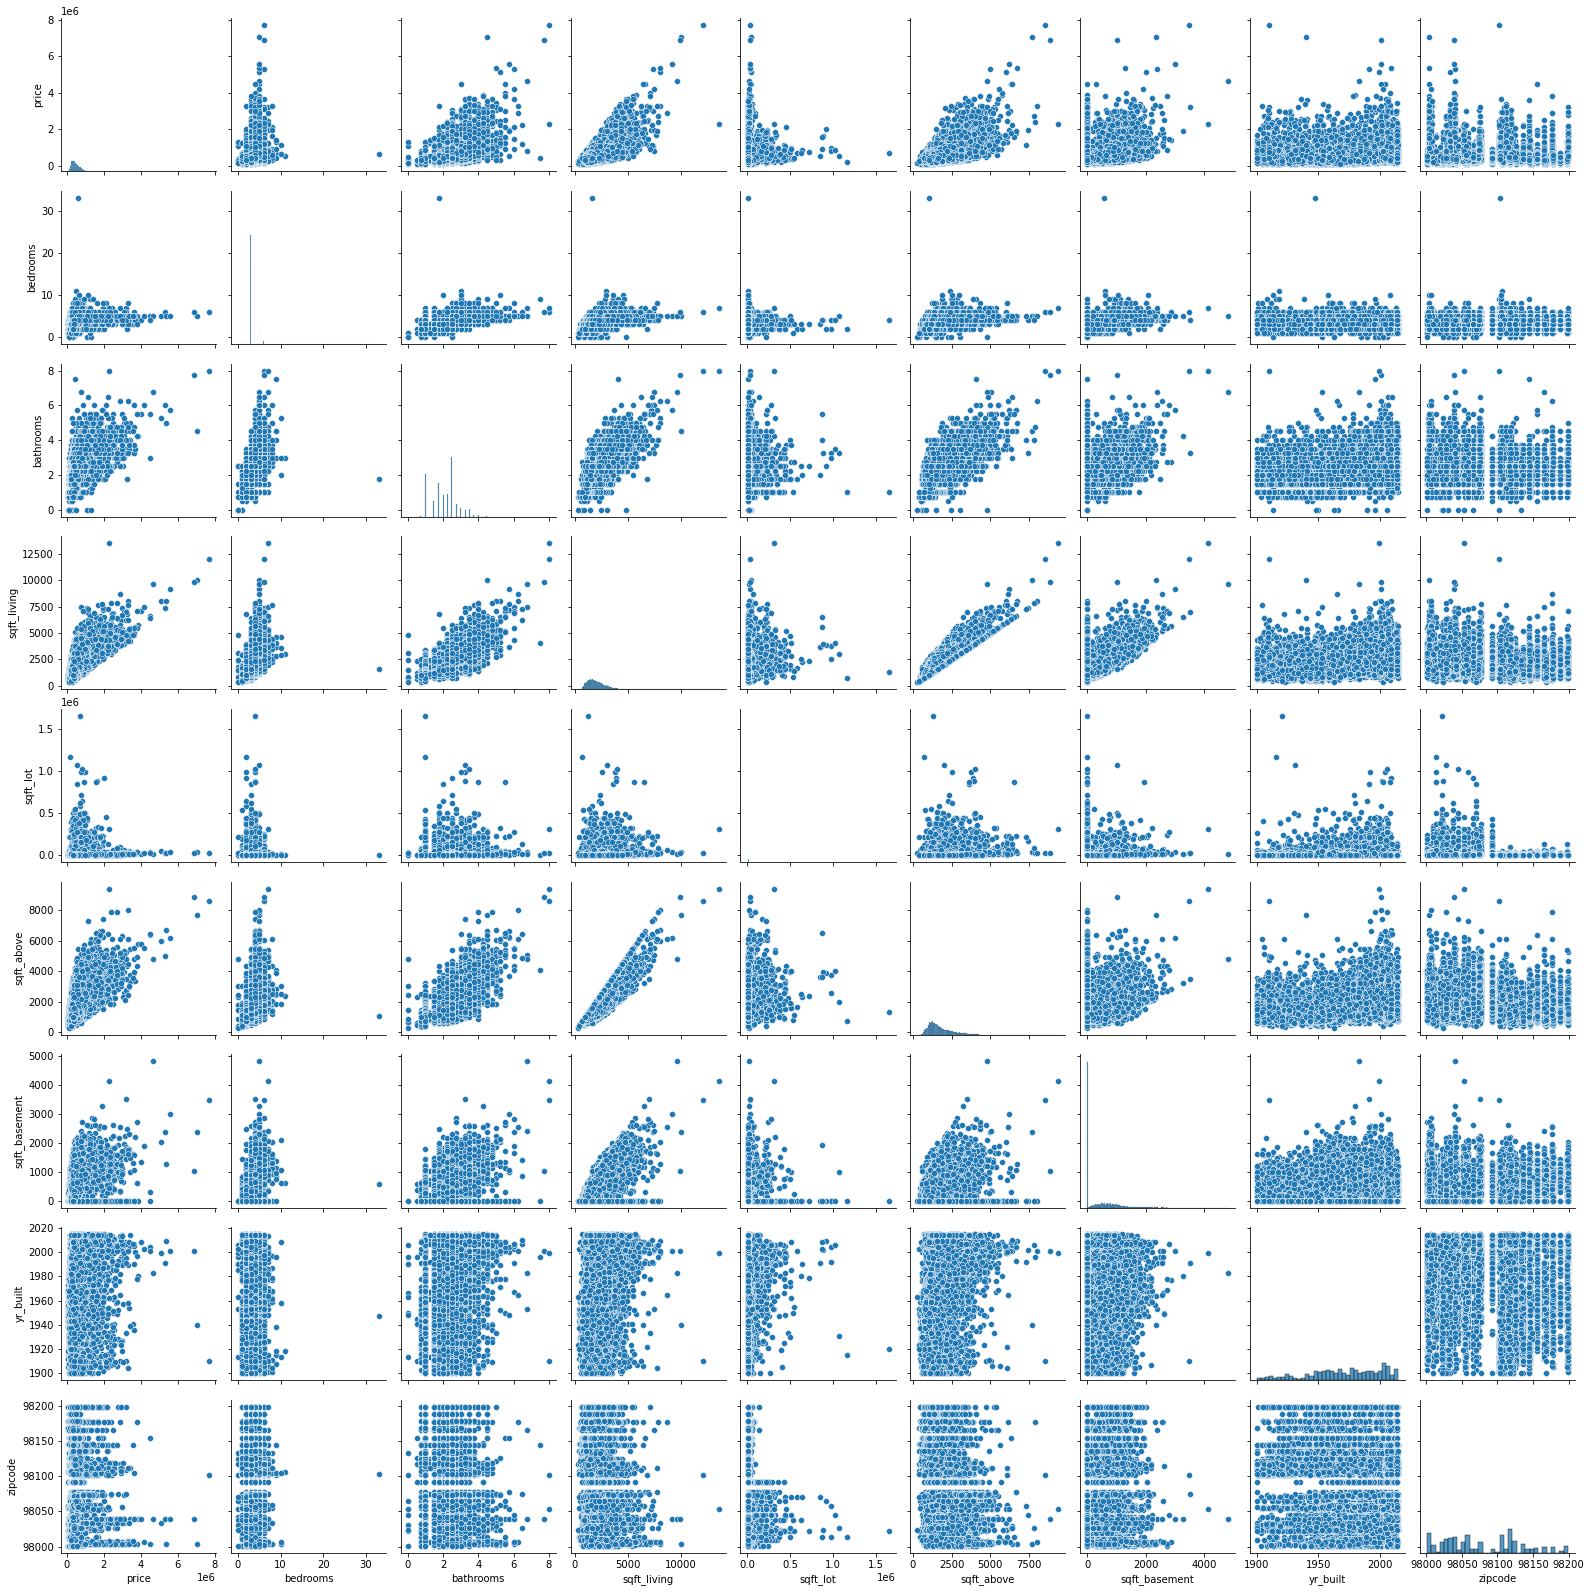

In [12]:
sns.pairplot(df[['price', 'bedrooms', 'bathrooms',  'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'yr_built', 'zipcode']])

In [13]:
feats = df[['price', 'bedrooms', 'bathrooms',  'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'yr_built', 'zipcode']]
correlations = feats.corr()

In [14]:
correlations

,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,zipcode
price,1.000000,0.308350,0.525138,0.702035,0.089661,0.605567,0.323816,0.054012,-0.053203
bedrooms,0.308350,1.000000,0.515884,0.576671,0.031703,0.477600,0.303093,0.154178,-0.152668
bathrooms,0.525138,0.515884,1.000000,0.754665,0.087740,0.685342,0.283770,0.506019,-0.203866
sqft_living,0.702035,0.576671,0.754665,1.000000,0.172826,0.876597,0.435043,0.318049,-0.199430
sqft_lot,0.089661,0.031703,0.087740,0.172826,1.000000,0.183512,0.015286,0.053080,-0.129574
sqft_above,0.605567,0.477600,0.685342,0.876597,0.183512,1.000000,-0.051943,0.423898,-0.261190
sqft_basement,0.323816,0.303093,0.283770,0.435043,0.015286,-0.051943,1.000000,-0.133124,0.074845
yr_built,0.054012,0.154178,0.506019,0.318049,0.053080,0.423898,-0.133124,1.000000,-0.346869
zipcode,-0.053203,-0.152668,-0.203866,-0.199430,-0.129574,-0.261190,0.074845,-0.346869,1.000000


<AxesSubplot:>

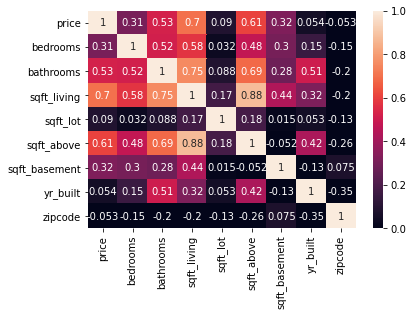

In [15]:
sns.heatmap(correlations, vmin=0, vmax=1, annot=True)

From the heat map the features of 'bedrooms', 'bathrooms',  'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'yr_built', 'zipcode' are the features I have choosen because they show a positive linear relationship .
They have at least a moderate strength . They've  a 0.3,  which is a moderately strong relationship with the price variable.

# 3. Split your dataset into a training set and a testing set. 

In [16]:
X= df[['bedrooms', 'bathrooms',  'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'yr_built', 'zipcode']]

y = df['price']

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# 4. Apply Linear regression to your training set. 

In [19]:
from sklearn.linear_model import LinearRegression 

lm = LinearRegression() 

lm.fit(X_train,y_train) 


LinearRegression()

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
model= LinearRegression().fit(X_train,y_train)

In [22]:
model.score(X, y, sample_weight=None)

0.5538009219001494

In [23]:
y_predicts = model.predict(X_test)

# 5. Plot the linear regression. 

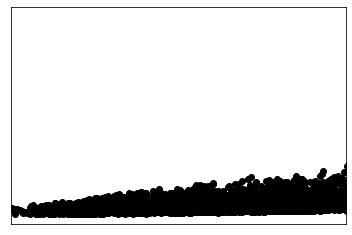

In [30]:

#plt.scatter(df['sqft_living'] , df['price'] ,  color='black')
#plt.plot(df['sqft_living'] , df['price'], color='blue', linewidth=3)
 
#plt.xlim([400,2500])   
#plt.xticks(())
#plt.yticks(())
#plt.show()

ModuleNotFoundError: No module named 'plotly'

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

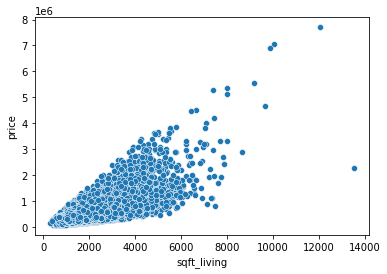

In [31]:
sns.scatterplot(data=df, x="sqft_living", y="price")

# 6 Measure the performance of linear regression using the testing set. 

In [32]:
model.score(X, y, sample_weight=None)

0.5538009219001494

# 7. Apply multi-linear regression and compare it to the linear model. 

In [34]:
import statsmodels.api as sm
df['intercept'] = 1 


In [37]:
lm = sm.OLS(df['price'], df[['intercept', 'sqft_living','bedrooms', 'bathrooms', 'sqft_lot']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.509
Model:                            OLS   Adj. R-squared:                  0.509
Method:                 Least Squares   F-statistic:                     5592.
Date:                Thu, 02 Sep 2021   Prob (F-statistic):               0.00
Time:                        21:31:03   Log-Likelihood:            -2.9993e+05
No. Observations:               21613   AIC:                         5.999e+05
Df Residuals:                   21608   BIC:                         5.999e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept    7.909e+04   6918.599     11.432      0.000    6.55e+04    9.27e+04
sqft_living   314.2917      3.132    100.356      0.000     308.153     320.430
bedrooms    -5.941e+04   2337.207    -25.418      0.000    -6.4e+04   -5.48e+04
bathrooms    6268.6604   3509.574      1.786      0.074    -610.363    1.31e+04
sqft_lot       -0.3777      0.043     -8.757      0.000      -0.462      -0.293
==============================================================================
Omnibus:                    14361.495   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           483330.656
Skew:                           2.719   Prob(JB):                         0.00
Kurtosis:                      25.520   Cond. No.                     1.81e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.81e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# 8. Apply Polynomial regression and compare it to linear and multilinear regression. 

Note: Every result has to be interpreted and justified (write your interpretations in a markdown).

In [41]:
from sklearn.preprocessing import PolynomialFeatures

polyfeat=PolynomialFeatures(degree=2)
xtrain_poly=polyfeat.fit_transform(df['sqft_living','bedrooms', 'bathrooms', 'sqft_lot'])
xtest_poly=polyfeat.fit_transform(df['sqft_living','bedrooms', 'bathrooms', 'sqft_lot'])

poly=linear_model.LinearRegression()
poly.fit(xtrain_poly,train_data['price'])
polypred=poly.predict(xtest_poly)

print('Complex Model_3')
mean_squared_error = metrics.mean_squared_error(test_data['price'], polypred)
print('Mean Squared Error (MSE) ', round(np.sqrt(mean_squared_error), 2))
print('R-squared (training) ', round(poly.score(xtrain_poly, train_data['price']), 3))
print('R-squared (testing) ', round(poly.score(xtest_poly, test_data['price']), 3))

KeyError: ('sqft_living', 'bedrooms', 'bathrooms', 'sqft_lot')